In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_json("https://api.covid19india.org/raw_data.json")

In [0]:
data = pd.json_normalize(df['raw_data'])

In [0]:
#data['dateannounced'] = data['dateannounced'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').date())
data['statuschangedate'] = data[data['statuschangedate'] != ""]['statuschangedate'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').date())

In [0]:
data['dateannounced'] = data[data['dateannounced'] != ""]['dateannounced'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').date())

In [0]:
data = data.dropna()

In [7]:
#first case in India
print("First case in India detected on:  {}".format(str(min(data['dateannounced']))))

First case in India detected on:  2020-01-30


In [8]:
print("Total Cases till date: {}".format(data.count()[0]))

Total Cases till date: 8214


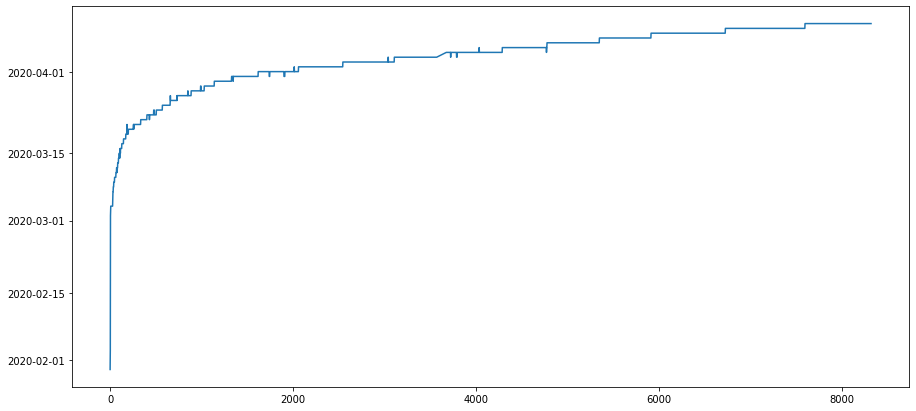

In [9]:
plt.figure(figsize=(15, 7))
plt.plot(data['dateannounced'])
plt.show()

In [10]:
# data=data[data["agebracket"]!=""]
# data["agebracket"] = data["agebracket"].apply(lambda x: (int(str(x[0:2]))+int(str(x[3:5])))/2 if len(x) == 5 else x)
data_based_on_age = data[data["agebracket"].astype(str).str.isdigit()]
data_based_on_age.info

<bound method DataFrame.info of      agebracket  ... typeoftransmission
0            20  ...           Imported
3            45  ...           Imported
4            24  ...           Imported
5            69  ...           Imported
6            55  ...           Imported
...         ...  ...                ...
7681         27  ...              Local
7682         31  ...              Local
7683         26  ...              Local
7893         45  ...                   
8007         10  ...              Local

[1171 rows x 20 columns]>

In [11]:
data_based_on_age["agebracket"] = data_based_on_age["agebracket"].apply(pd.to_numeric)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Age group')

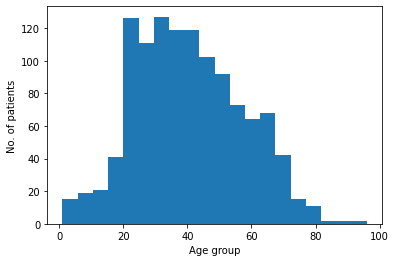

In [12]:
plt.hist(data_based_on_age["agebracket"], bins=20)
plt.ylabel("No. of patients")
plt.xlabel("Age group")

In [13]:
data_based_on_age.describe()

,agebracket
count,1171.000000
mean,40.374039
std,16.872427
min,1.000000
25%,27.000000
50%,39.000000
75%,53.000000
max,96.000000


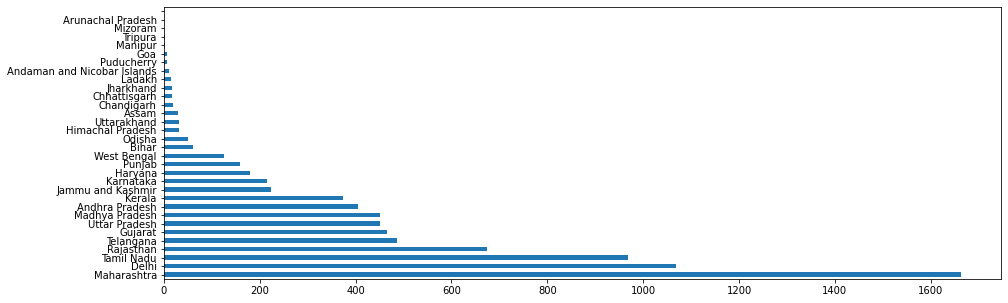

In [14]:
data['detectedstate'].value_counts().plot(kind='barh', figsize=(15,5))

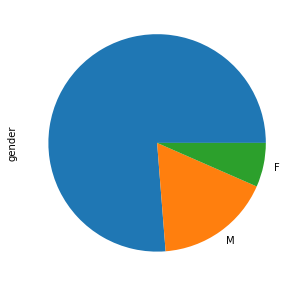

In [15]:
data['gender'].value_counts().plot(kind='pie', figsize=(15,5))

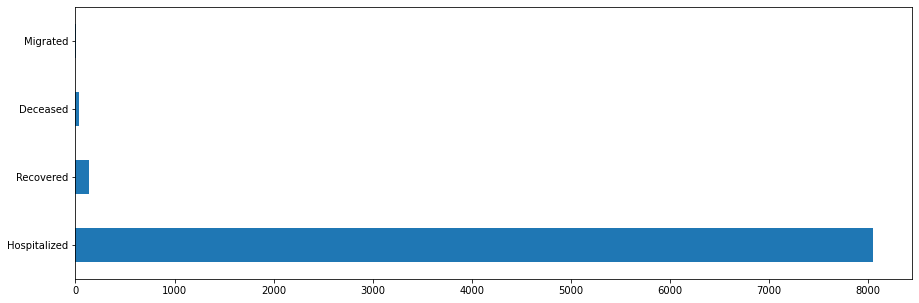

In [16]:
#Life expectancy
data['currentstatus'].value_counts().plot(kind='barh', figsize=(15,5))


In [17]:
#Life expectancy in Male
data[data['gender']=='M']['currentstatus'].value_counts()


Hospitalized    1330
Recovered         62
Deceased          20
Name: currentstatus, dtype: int64

In [18]:
#Life expectancy in Female
data[data['gender']=='F']['currentstatus'].value_counts()


Hospitalized    500
Recovered        30
Deceased          9
Name: currentstatus, dtype: int64

In [19]:
#Top five affected District
data['detectedstate'].value_counts().head(5)

Maharashtra    1663
Delhi          1069
Tamil Nadu      969
Rajasthan       674
Telangana       487
Name: detectedstate, dtype: int64

In [20]:
#Top ten affected District
data['detecteddistrict'].value_counts().head(25)

                       1785
Mumbai                  929
Jaipur                  286
Ahmadabad               243
Pune                    239
Indore                  235
Chennai                 182
Kasaragod               166
Thane                   128
Bhopal                  116
Hyderabad               104
Coimbatore               97
Vadodara                 95
Agra                     92
Kurnool                  82
Guntur                   75
Kannur                   71
Bengaluru                68
Gautam Buddha Nagar      62
Erode                    60
Tirunelveli              58
Dindigul                 55
S.A.S. Nagar             50
Evacuees                 49
Meerut                   48
Name: detecteddistrict, dtype: int64

In [21]:
#top reasons behind affection in India
data['notes'].value_counts().head(10)

Details awaited                    4362
                                   1089
Travelled to Delhi                  863
Details Awaited                     377
Travelled from Dubai                 90
Local Transmission                   89
Travelled from UK                    26
Have identified contact history      26
Travelled from Dubai, UAE            25
Contact transmission                 23
Name: notes, dtype: int64

In [22]:
data['typeoftransmission'].value_counts().head(10)

             5382
Local        1606
TBD           630
Imported      594
Imported        2
Name: typeoftransmission, dtype: int64

Details awaited                                                            73
Travelled to Delhi                                                         67
Contact of Patient, ID Unknown                                              9
Family contact of TN-P42                                                    4
Details Awaited                                                             4
No Info                                                                     3
Contact of Positive Patient                                                 2
Travelled from USA via London on 17 March                                   1
Travelled from London via Bangaloe then to Chennai by Car on 14th March     1
Travelled to US                                                             1
Name: notes, dtype: int64


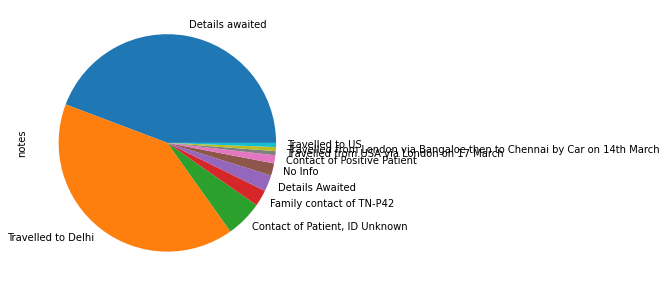

In [23]:
#Top reasons behind corona afefction in Chennai
print(data[data['detecteddistrict']=='Chennai']['notes'].value_counts().head(10))
data[data['detecteddistrict']=='Chennai']['notes'].value_counts().head(10).plot(kind='pie', figsize=(15,5))

Travelled to Delhi                                               506
Details awaited                                                  349
Contact of Patient, ID Unknown                                    18
Travelled from Delhi and Contact history with TN-P5 and TN-P6     10
Travelled from Delhi                                              10
Contact of Positive Patient                                        5
Family contact of TN-P42                                           4
Indonesian Tourist                                                 4
No Info                                                            4
Details Awaited                                                    4
Name: notes, dtype: int64


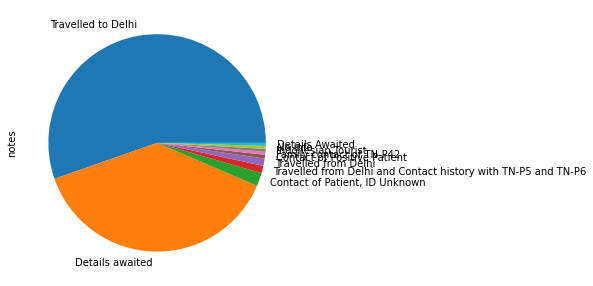

In [24]:
#Top reasons behind corona afefction in TamilNadu
print(data[data['statecode']=='TN']['notes'].value_counts().head(10))
data[data['statecode']=='TN']['notes'].value_counts().head(10).plot(kind='pie', figsize=(15,5))

In [0]:
data['time_taken_to_change_status'] = data['statuschangedate'] - data['dateannounced']

In [26]:
#Average time taken by to recover
time_taken_to_recover = data[(data['currentstatus'] == 'Recovered') & (data['time_taken_to_change_status'] != '0 days')]['time_taken_to_change_status']
print("Average time taken to recover {}".format(str(time_taken_to_recover.mode())))

Average time taken to recover 0    8 days
1   25 days
dtype: timedelta64[ns]


In [27]:
#Average time taken by to get deceased
time_taken_to_decease = data[(data['currentstatus'] == 'Deceased') & (data['time_taken_to_change_status'] != '0 days')]['time_taken_to_change_status']
print("Average time taken to get deceased {}".format(str(time_taken_to_decease.mean())))
print("Maximum time taken in case of deceased {}".format(str(time_taken_to_decease.max())))

Average time taken to get deceased 2 days 00:00:00
Maximum time taken in case of deceased 6 days 00:00:00


Text(0.5, 0, 'Age group')

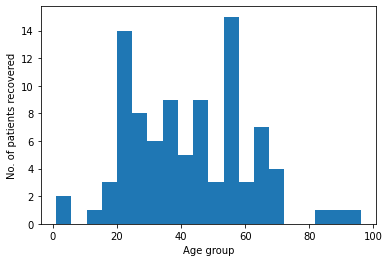

In [28]:
plt.hist(data_based_on_age[data_based_on_age['currentstatus'] == "Recovered"]["agebracket"], bins=20)
plt.ylabel("No. of patients recovered")
plt.xlabel("Age group")

Text(0.5, 0, 'Age group')

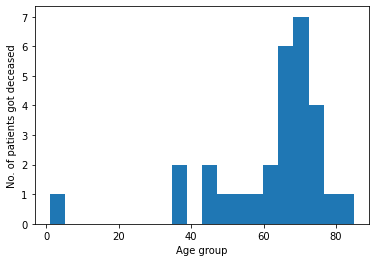

In [29]:
plt.hist(data_based_on_age[data_based_on_age['currentstatus'] == "Deceased"]["agebracket"], bins=20)
plt.ylabel("No. of patients got deceased")
plt.xlabel("Age group")

In [0]:
from datetime import date
data['patient_duration'] = date.today() - data['dateannounced']

In [31]:
#Hospitalized since
data[data['currentstatus'] == 'Hospitalized']['patient_duration'].value_counts()

1 days     871
2 days     813
0 days     724
6 days     599
4 days     570
3 days     564
8 days     559
5 days     488
9 days     486
7 days     476
10 days    424
11 days    305
12 days    185
15 days    147
14 days    136
13 days    104
19 days     85
17 days     81
21 days     69
18 days     62
16 days     62
20 days     59
22 days     52
24 days     22
23 days     21
25 days     14
26 days     12
28 days     11
27 days      8
31 days      8
29 days      6
38 days      5
32 days      4
33 days      4
30 days      4
35 days      2
37 days      1
Name: patient_duration, dtype: int64

In [32]:
#Top reasons behind corona afefction in top affected cities
for city in ["Mumbai", "Kasaragod", "Jaipur", "Indore", "Coimbatore", "Kannur", "Bengaluru"]:
  print("\n City name: ",city)
  print(data[data['detecteddistrict']==city]['notes'].value_counts().head(5))


 City name:  Mumbai
Details awaited                    646
                                   206
Details Awaited                     48
Travel history, details awaited      3
Contact Transmission                 2
Name: notes, dtype: int64

 City name:  Kasaragod
Travelled from Dubai                     57
Travelled from Dubai, UAE                19
Contact transmission                     17
Details awaited                          17
Contact transmission. details awaited    11
Name: notes, dtype: int64

 City name:  Jaipur
Details awaited                                                                                            198
Details Awaited                                                                                             38
Contacts of first positive in Ramganj                                                                       13
Family member of Patient, ID Unknown                                                                         8
Contacts of a person wh

Conclusion: Metro cities are badly affected by Corona virus.
Kasargod is in worst condition even it is not metro city.
The main reason behind spread of Corona virus is Delhi religious conference and persons travelled from UK and Dubai. Average time taken to recover of patients is around 25 days. If patients is alive more than 5 days, then chances of recovery are high.